In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프를 그리기 위한 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 데이터를 불러온다.

In [2]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


- 이 데이터는 미국에서 생산된 자동차와 관련된 데이터이다
- Unnamed:0 : 의미가 없는 데이터. 0부터 1씩 증가되는 값으로 구성되어 있다.
- manufacturer : 자동차 제조사
- model : 자동차 모델명
- displ : 배기량
- year : 제조년도
- cyl : 실린더 수
- trans : 변속기 종류
- drv : 구동방식(f = 전륜구동, r = 후륜구동, 4 = 사륜구동)
- cty : 도시연비
- hwy : 고속도로 연비
- fl : 연료 종류(c : 가스, d : 디젤, e : 에탄올 혼합연로, p : 고급 휘발유, r : 일반 휘발유)
- class : 자동차 종류

### 데이터 정보 확인

In [3]:
# 데이터 프레임 요약 정보
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [4]:
# 결측치 확인
mpg_df.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [5]:
# Unnamed:0 컬럼 확인
# 0 부터 1씩 증가되는 값이 있는 컬럼이다.
# 제거한다.
mpg_df.drop('Unnamed: 0', axis=1, inplace=True)
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 각 제조사별 자동차 종류 수를 시각화 해본다.
- 자동차 종류수로 내림차순 정렬하여 시각화 한다.

In [15]:
car_manu = mpg_df.manufacturer.unique()
car_manu

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [16]:
manufacture_count = np.zeros(len(car_manu))
manufacture_list = pd.Series(manufacture_count, index=car_manu, dtype='int')
manufacture_list

audi          0
chevrolet     0
dodge         0
ford          0
honda         0
hyundai       0
jeep          0
land rover    0
lincoln       0
mercury       0
nissan        0
pontiac       0
subaru        0
toyota        0
volkswagen    0
dtype: int64

In [17]:
car_mod = mpg_df.model.unique()
car_mod

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [27]:
for model in car_mod:
    finder = mpg_df.query('model == @model')
    made = finder['manufacturer'].iloc[0]
    manufacture_list[made] = manufacture_list[made]+1

manufacture_list
    

audi          3
chevrolet     4
dodge         4
ford          4
honda         1
hyundai       2
jeep          1
land rover    1
lincoln       1
mercury       1
nissan        3
pontiac       1
subaru        2
toyota        6
volkswagen    4
dtype: int64

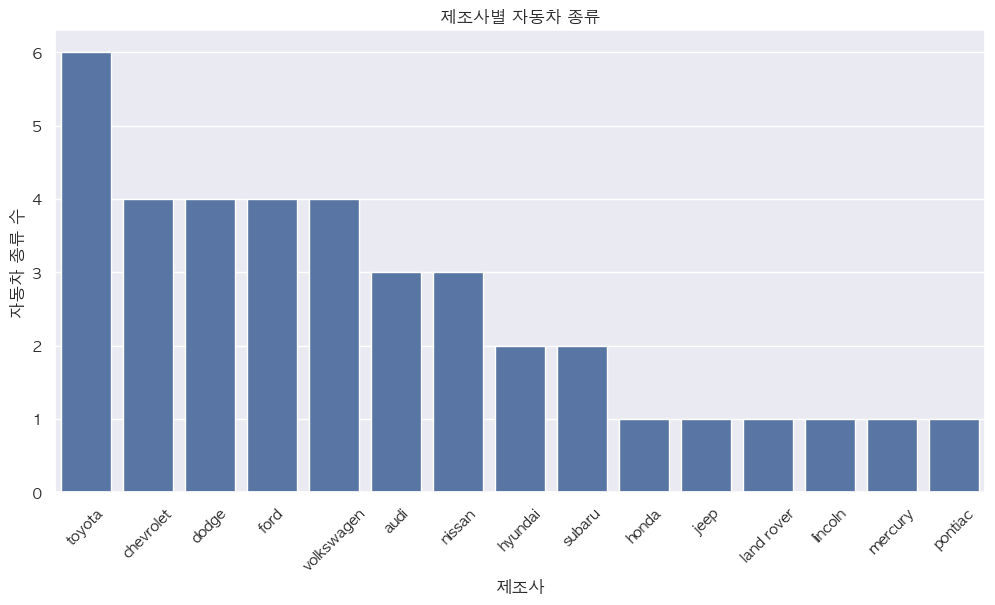

In [31]:
df_plot = manufacture_list.reset_index()
df_plot.columns = ['제조사', '자동차 종류 수']

df_plot = df_plot.sort_values(by='자동차 종류 수', ascending=False)

sns.barplot(data=df_plot, x='제조사', y='자동차 종류 수')
plt.title('제조사별 자동차 종류')
plt.xticks(rotation=45)
plt.show()


---
### Teacher's Version

In [32]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [33]:
# 데이터 프레임 요약 정보
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [34]:
# 결측치 확인
mpg_df.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [35]:
# Unnamed:0 컬럼 확인
# 0 부터 1씩 증가되는 값이 있는 컬럼이다.
# 제거한다.
mpg_df.drop('Unnamed: 0', axis=1, inplace=True)
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [36]:
# a1 = mpg_df[['manufacturer', 'model']]
# a1.groupby('manufacturer').count()

manufacturer_count = mpg_df['manufacturer'].value_counts()
manufacturer_count

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

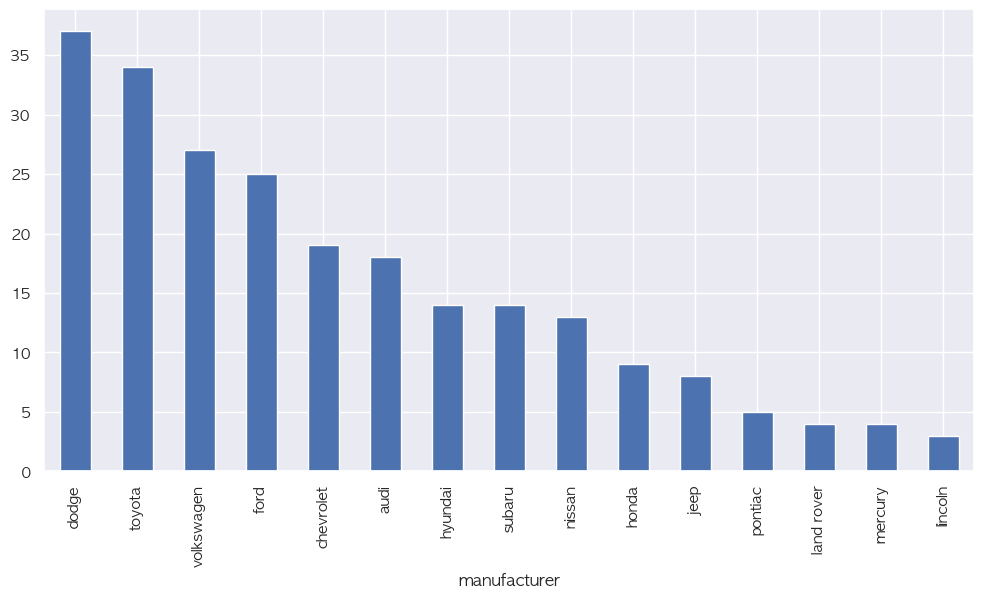

In [37]:
# pandas
manufacturer_count.plot(kind='bar')
plt.show()

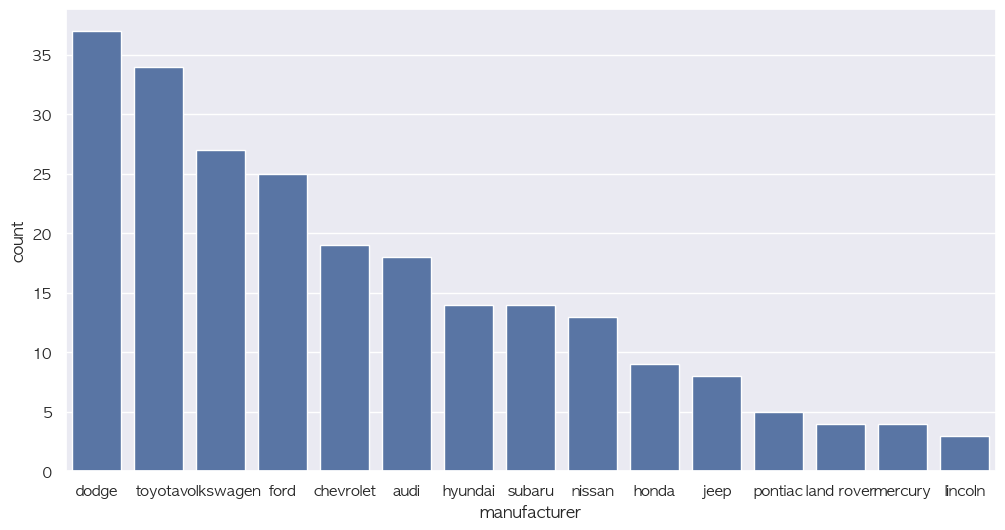

In [38]:
# seaborn
sns.countplot(data=mpg_df, x='manufacturer', order=manufacturer_count.index)
plt.show()

---

In [42]:
# 문제1) 자동차 제조회사(manufacturer)별로 각 년도(year)별 생산된 자동차의 종류(class) 수를 확인한다.
car_year = mpg_df.year.unique()
print(car_year)
print(car_manu)

[1999 2008]
['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']


In [43]:
df = pd.DataFrame(
    0,
    index=car_manu,
    columns=car_year
)
df

,1999,2008
audi,0,0
chevrolet,0,0
dodge,0,0
ford,0,0
honda,0,0
hyundai,0,0
jeep,0,0
land rover,0,0
lincoln,0,0
mercury,0,0


In [44]:
for manu in car_manu:
    for year in car_year:
        temp = mpg_df.query('manufacturer == @manu and year == @year')
        df.loc[manu, year] = temp['class'].nunique()

df

,1999,2008
audi,2,2
chevrolet,3,3
dodge,3,3
ford,3,3
honda,1,1
hyundai,2,2
jeep,1,1
land rover,1,1
lincoln,1,1
mercury,1,1


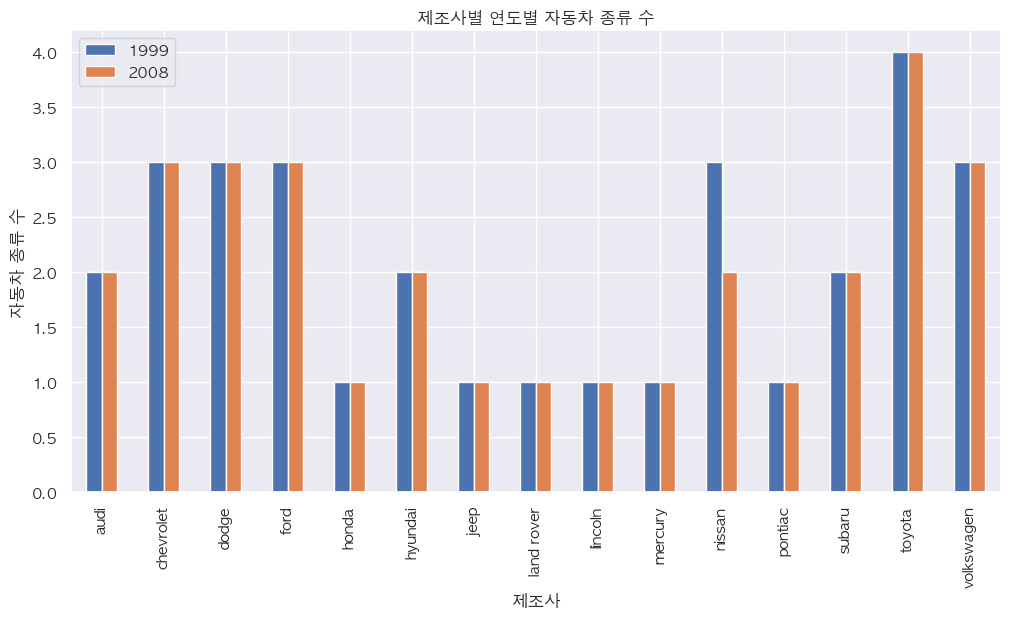

In [ ]:
df.plot(kind='bar')
plt.title('제조사별 연도별 자동차 종류 수')
plt.xlabel('제조사')
plt.ylabel('자동차 종류 수')

plt.show()


In [ ]:
# 문제2) 1999년에 생산된 자동차(year)와 2008년에 생산된 자동차(year)의 배기량(displ) 평균이 다른지 확인한다.
car_displ = np.zeros(len(car_year))
displ_avg = pd.Series(car_displ, index=car_year, dtype='float')
displ_avg

1999    0.0
2008    0.0
dtype: float64

In [54]:
for year in car_year:
    finder = mpg_df.query('year == @year')
    displ_avg[year] = finder['displ'].mean()

displ_avg
    

1999    3.281197
2008    3.662393
dtype: float64

In [55]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [56]:
# 문제3) 변속 방식(trans)에 따른 고속도로 연비(hwy)가 다른지 확인한다.

car_trans = mpg_df.trans.unique()
car_trans

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [57]:
hwy_data = {}

for t in car_trans:
    hwy_data[t] = mpg_df.query('trans == @t')['hwy'].values

hwy_data

{'auto(l5)': array([29, 26, 25, 25, 24, 19, 19, 12, 17, 12, 17, 18, 12, 17, 17, 17, 17,
        17, 19, 24, 22, 36, 36, 28, 22, 19, 12, 19, 18, 14, 17, 19, 20, 20,
        17, 31, 20, 29, 26]),
 'manual(m5)': array([29, 26, 26, 25, 17, 17, 16, 19, 17, 16, 26, 26, 22, 23, 33, 32, 29,
        34, 27, 31, 26, 29, 28, 24, 29, 25, 17, 25, 27, 25, 26, 26, 25, 27,
        20, 17, 29, 31, 26, 29, 31, 26, 35, 37, 20, 22, 17, 29, 24, 44, 29,
        29, 24, 44, 29, 28, 29, 26]),
 'manual(m6)': array([31, 28, 25, 26, 26, 24, 19, 16, 16, 12, 20, 29, 24, 32, 27, 18, 29,
        29, 29]),
 'auto(av)': array([30, 27, 31, 26, 25]),
 'auto(s6)': array([27, 25, 25, 23, 25, 26, 18, 18, 28, 18, 29, 29, 29, 29, 28, 26]),
 'auto(l4)': array([20, 15, 20, 17, 17, 23, 19, 14, 15, 17, 27, 30, 26, 29, 24, 22, 22,
        24, 24, 17, 22, 21, 18, 17, 15, 17, 16, 15, 15, 15, 17, 17, 17, 17,
        16, 17, 15, 17, 25, 21, 32, 32, 26, 30, 26, 26, 27, 24, 20, 17, 15,
        15, 17, 16, 17, 27, 26, 17, 26, 26, 27, 28

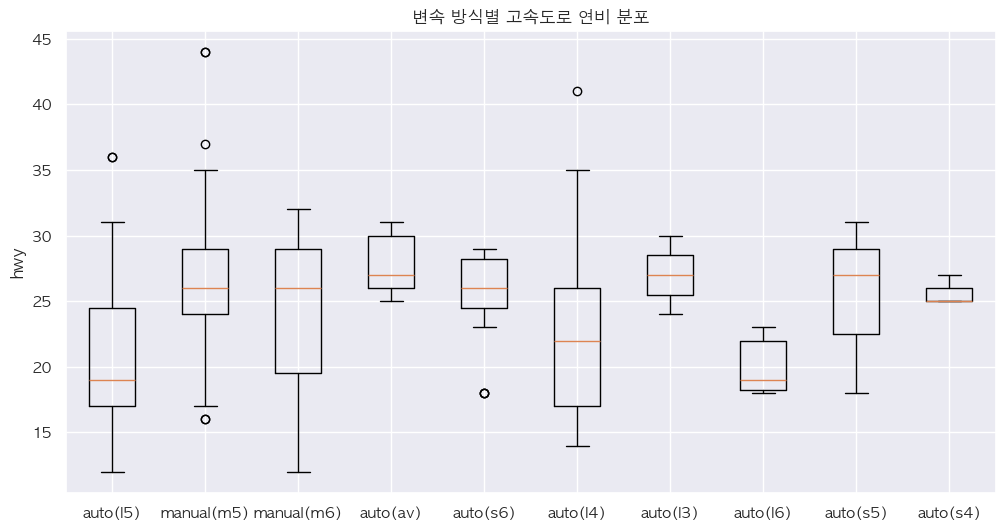

In [75]:
plt.figure()
plt.boxplot(hwy_data.values(), tick_labels=hwy_data.keys())
plt.title('변속 방식별 고속도로 연비 분포')
plt.ylabel('hwy')
plt.show()

In [63]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [68]:
# 문제4) 자동차의 종류(class)에 따라 시내 연비(cty)가 다른지 확인한다.

car_class = mpg_df['class'].unique()
car_class

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [74]:
cty_data = {}

for c in car_class:
    cty_data[c] = mpg_df[mpg_df['class'] == c]['cty'].values
cty_data

{'compact': array([18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 15, 21, 19,
        20, 20, 19, 20, 21, 21, 21, 22, 18, 18, 18, 24, 24, 26, 28, 26, 21,
        19, 21, 22, 17, 33, 21, 19, 22, 21, 21, 21, 16, 17]),
 'midsize': array([15, 17, 16, 19, 22, 18, 18, 17, 18, 18, 21, 21, 18, 18, 19, 23, 23,
        19, 19, 18, 19, 19, 18, 16, 17, 18, 16, 21, 21, 21, 21, 18, 18, 19,
        21, 18, 19, 21, 16, 18, 17]),
 'suv': array([14, 11, 14, 13, 12, 14, 11, 11, 14, 13, 13,  9, 13, 11, 13, 11, 11,
        11, 12, 14, 15, 14, 13, 13, 13, 17, 15, 15, 14,  9, 14, 13, 11, 11,
        12, 12, 11, 11, 11, 12, 14, 13, 13, 13, 14, 15, 14, 12, 18, 18, 20,
        19, 20, 18, 15, 16, 15, 15, 16, 14, 11, 13]),
 '2seater': array([16, 15, 16, 15, 15]),
 'minivan': array([18, 17, 16, 16, 17, 17, 11, 15, 15, 16, 16]),
 'pickup': array([15, 14, 13, 14, 14, 14,  9, 11, 11, 12,  9, 13, 13, 12,  9, 11, 11,
        13, 11, 14, 14, 13, 13, 13, 11, 13, 15, 16, 17, 15, 15, 15, 16]),
 'subcompact': arra

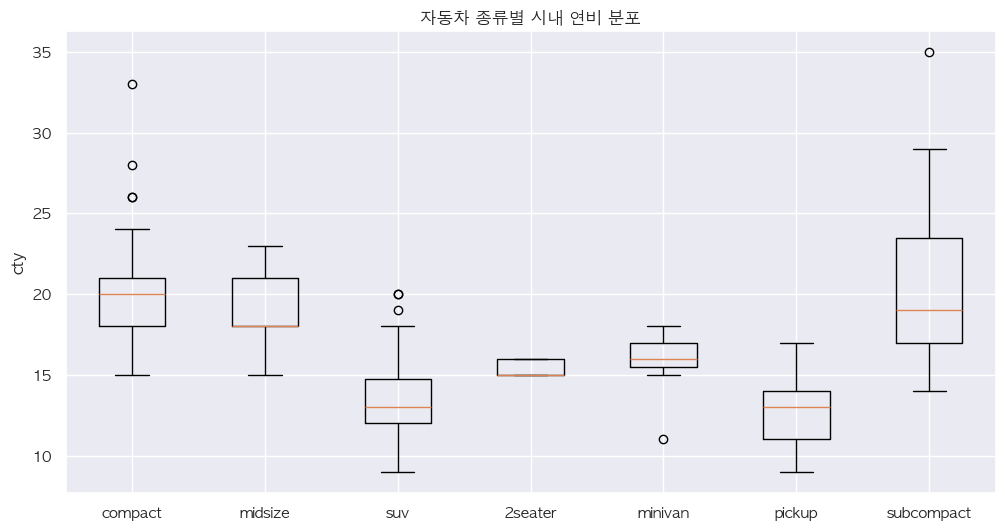

In [76]:
plt.figure()
plt.boxplot(cty_data.values(), tick_labels=cty_data.keys())
plt.title('자동차 종류별 시내 연비 분포')
plt.ylabel('cty')
plt.show()

In [77]:
# 문제5) 자동차 제조사(manufacturer)별 고속도로 연비(hwy) 평균이 가장 높은 top5,
# 시내 연비(cty) 평균이 가장 높은 top5를 각각 찾아본다.

cty_avg = {}

for c, values in cty_data.items():
    cty_avg[c] = values.mean()
cty_avg

{'compact': np.float64(20.127659574468087),
 'midsize': np.float64(18.75609756097561),
 'suv': np.float64(13.5),
 '2seater': np.float64(15.4),
 'minivan': np.float64(15.818181818181818),
 'pickup': np.float64(13.0),
 'subcompact': np.float64(20.37142857142857)}

In [78]:
hwy_avg = {}

for h, values in hwy_data.items():
    hwy_avg[h] = values.mean()
hwy_avg

{'auto(l5)': np.float64(20.71794871794872),
 'manual(m5)': np.float64(26.29310344827586),
 'manual(m6)': np.float64(24.210526315789473),
 'auto(av)': np.float64(27.8),
 'auto(s6)': np.float64(25.1875),
 'auto(l4)': np.float64(21.96385542168675),
 'auto(l3)': np.float64(27.0),
 'auto(l6)': np.float64(20.0),
 'auto(s5)': np.float64(25.333333333333332),
 'auto(s4)': np.float64(25.666666666666668)}

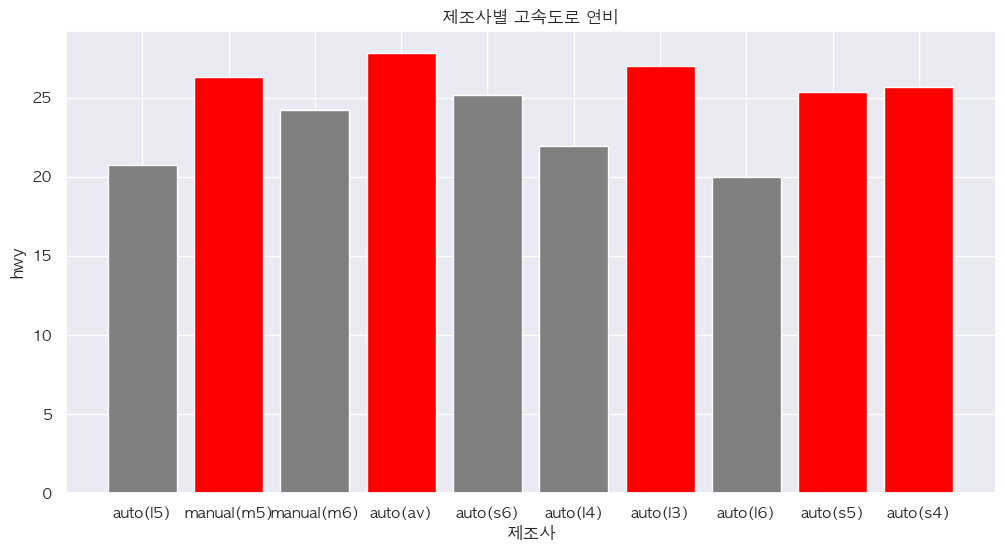

In [80]:
hd = pd.Series(hwy_avg)
hd_top5_index = hd.sort_values(ascending=False).head(5).index
colors = ['red' if idx in hd_top5_index else 'gray' for idx in hd.index]

plt.figure()
plt.bar(hd.index, hd.values, color=colors)

plt.title('제조사별 고속도로 연비')
plt.xlabel('제조사')
plt.ylabel('hwy')

plt.show()


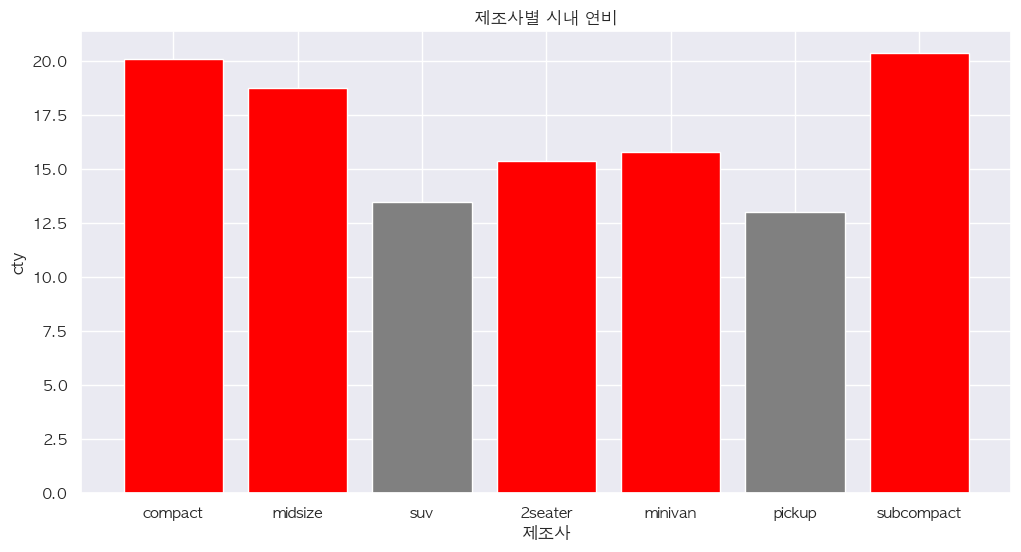

In [81]:
cd = pd.Series(cty_avg)
cd_top5_index = cd.sort_values(ascending=False).head(5).index
colors = ['red' if idx in cd_top5_index else 'gray' for idx in cd.index]

plt.figure()
plt.bar(cd.index, cd.values, color=colors)

plt.title('제조사별 시내 연비')
plt.xlabel('제조사')
plt.ylabel('cty')

plt.show()

---
### Teacher's Version

### 문제1) 자동차 제조회사(manufacturer)별로 각 년도(year)별 생산된 자동차의 종류(class) 수를 확인한다.

In [82]:
# 필요한 컬럼들을 가져온다.
mpg_df_sub = mpg_df[['manufacturer', 'year', 'class']]
mpg_df_sub

,manufacturer,year,class
0,audi,1999,compact
1,audi,1999,compact
2,audi,2008,compact
3,audi,2008,compact
4,audi,1999,compact
...,...,...,...
229,volkswagen,2008,midsize
230,volkswagen,2008,midsize
231,volkswagen,1999,midsize
232,volkswagen,1999,midsize


In [83]:
mpg_df_sub.columns = ['제조사', '제조년도', '종류']
a1 = mpg_df_sub.groupby(['제조사', '제조년도']).count()
a1

종류
제조사        제조년도    
audi       1999   9
           2008   9
chevrolet  1999   7
           2008  12
dodge      1999  16
           2008  21
ford       1999  15
           2008  10
honda      1999   5
           2008   4
hyundai    1999   6
           2008   8
jeep       1999   2
           2008   6
land rover 1999   2
           2008   2
lincoln    1999   2
           2008   1
mercury    1999   2
           2008   2
nissan     1999   6
           2008   7
pontiac    1999   3
           2008   2
subaru     1999   6
           2008   8
toyota     1999  20
           2008  14
volkswagen 1999  16
           2008  11

In [84]:
mpg_df_sub.columns = ['제조사', '제조년도', '종류']
a1 = mpg_df_sub.groupby(['제조사', '제조년도'], as_index=False).count()
a1

,제조사,제조년도,종류
0,audi,1999,9
1,audi,2008,9
2,chevrolet,1999,7
3,chevrolet,2008,12
4,dodge,1999,16
5,dodge,2008,21
6,ford,1999,15
7,ford,2008,10
8,honda,1999,5
9,honda,2008,4


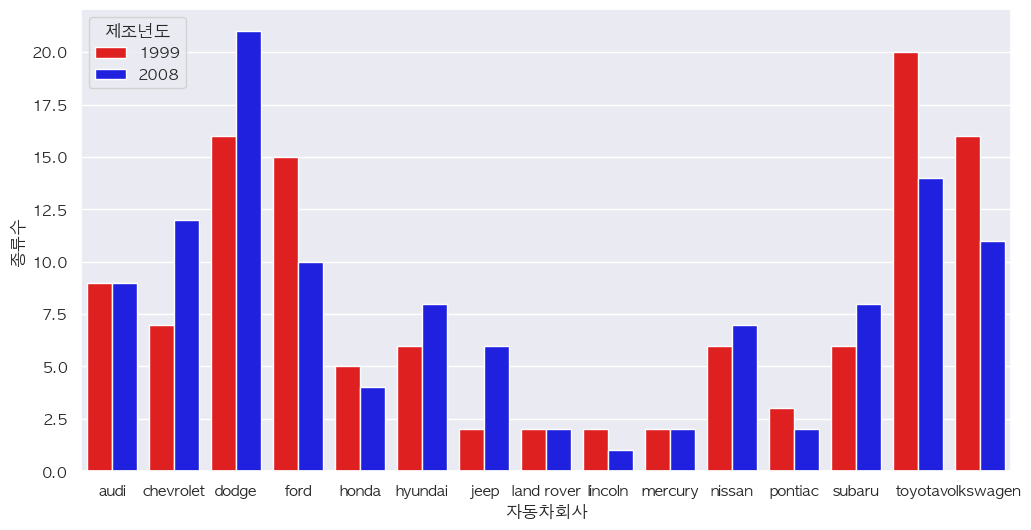

In [85]:
# 그래프를 그린다.
a1.columns = ['자동차회사', '제조년도', '종류수']
# errorbar : 신뢰구간을 표시하는 막대에 대한 설정이다. 기본이 ("ci", 95)로 되어 있으며 
# +-5 % 정도의 오차가 발생할 수 있다는 것을 표시하게된다. None을 넣어주면 사라진다.
sns.barplot(data=a1, x='자동차회사', y='종류수', errorbar=None, hue='제조년도', palette=['red', 'blue'])
plt.show()

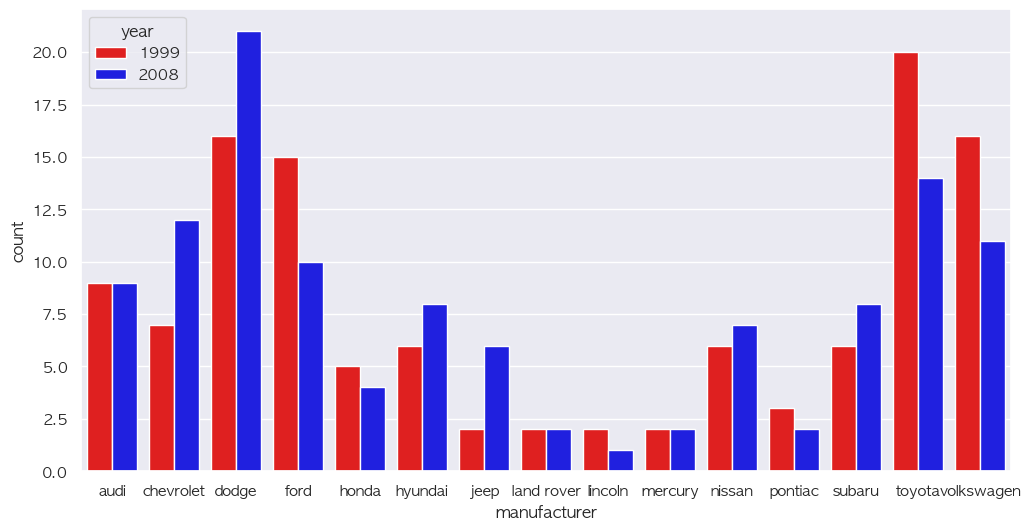

In [86]:
sns.countplot(data=mpg_df, x='manufacturer', hue='year', palette=['red', 'blue'])
plt.show()

In [87]:
# year를 기준으로 그룹을 묶고 배기량 평균을 구한다.
a1 = mpg_df[['year', 'displ']]
a2 = a1.groupby('year').mean()
a2

,displ
year,
1999,3.281197
2008,3.662393


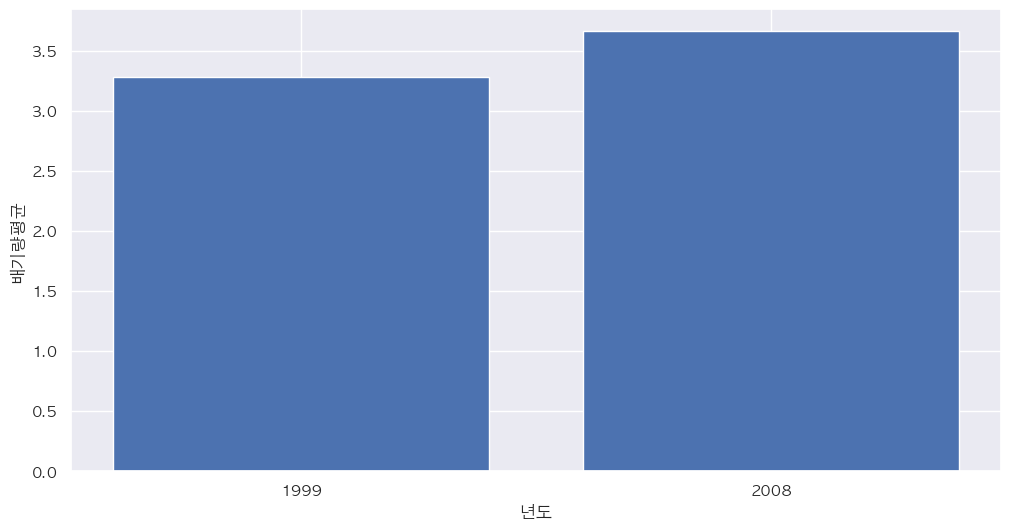

In [89]:
# matplotlib로 시각화한다.
x = a2.index.astype('str')
y = a2['displ'].values

plt.bar(x, y)
plt.xlabel('년도')
plt.ylabel('배기량평균')
plt.show()

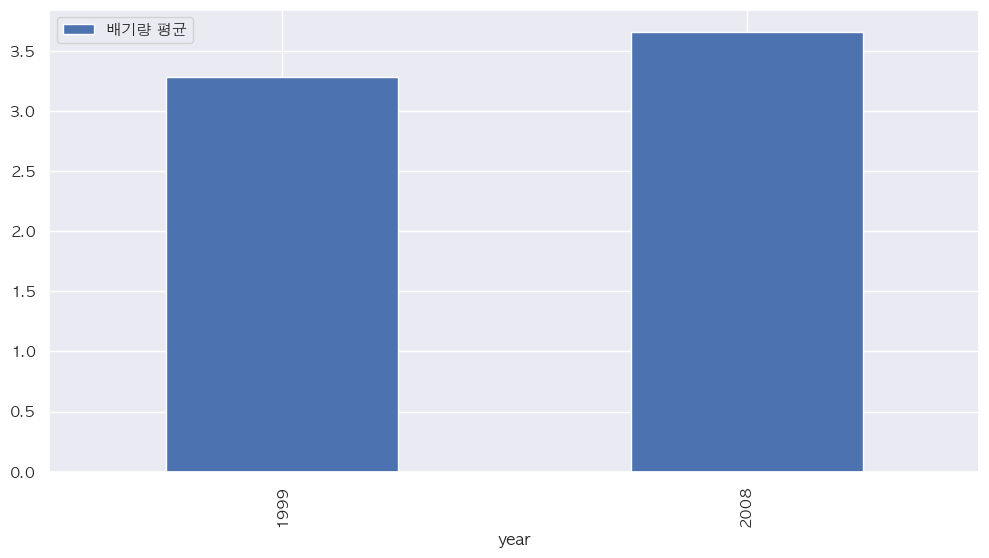

In [90]:
# pandas
a3 = a2.copy()

a3.columns = ['배기량 평균']
a3.plot(kind='bar')
plt.show()

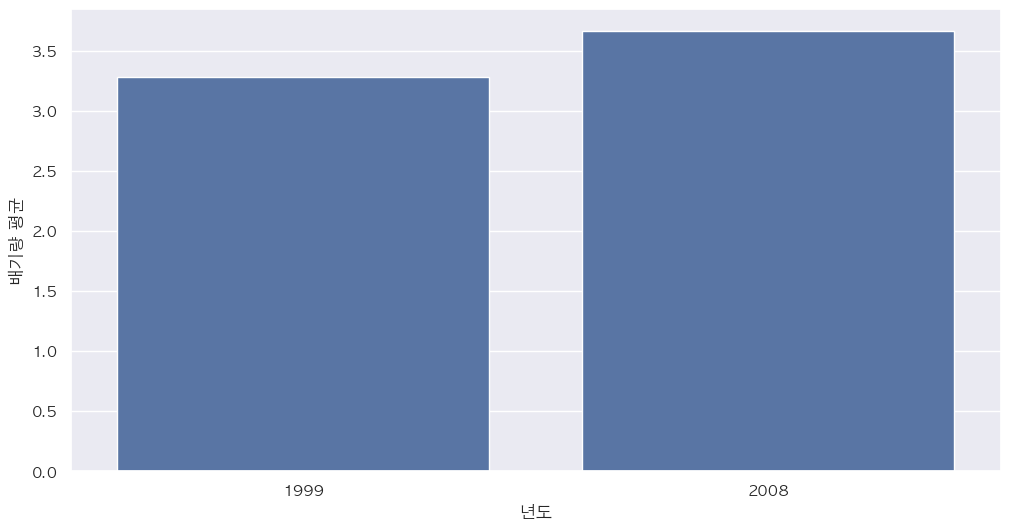

In [91]:
# seaborn
# index를 컬럼으로 변경한다.
a3 = a2.copy()
a3.reset_index(inplace=True)
a3.columns = ['년도', '배기량 평균']

sns.barplot(data=a3, x='년도', y='배기량 평균')
plt.show()

- 1999년 평균 연비 : 3.281197
- 2008년 평균 연비 : 3.662393
- 2008년의 평균 연비는 1999년 보다 더 높아졌다.

### 문제3) 변속 방식(trans)에 따른 고속도로 연비(hwy)가 다른지 확인한다.

In [92]:
# 필요한 컬럼들만 가지고 온다.
a1 = mpg_df[['trans', 'hwy']]
a1

,trans,hwy
0,auto(l5),29
1,manual(m5),29
2,manual(m6),31
3,auto(av),30
4,auto(l5),26
...,...,...
229,auto(s6),28
230,manual(m6),29
231,auto(l5),26
232,manual(m5),26


In [93]:
# 필요한 컬럼들만 가지고 온다.
a1 = mpg_df[['trans', 'hwy']]
a1.columns = ['변속_방식', '고속도로_연비']
a1

,변속_방식,고속도로_연비
0,auto(l5),29
1,manual(m5),29
2,manual(m6),31
3,auto(av),30
4,auto(l5),26
...,...,...
229,auto(s6),28
230,manual(m6),29
231,auto(l5),26
232,manual(m5),26


In [94]:
# 변속 방식에 따른 고속도로 연비 평균
a2 = a1.groupby('변속_방식', as_index=False).mean()
a2

,변속_방식,고속도로_연비
0,auto(av),27.800000
1,auto(l3),27.000000
2,auto(l4),21.963855
3,auto(l5),20.717949
4,auto(l6),20.000000
5,auto(s4),25.666667
6,auto(s5),25.333333
7,auto(s6),25.187500
8,manual(m5),26.293103
9,manual(m6),24.210526


In [95]:
# 정렬한다.
a3 = a2.sort_values('고속도로_연비', ascending=False)
a3.reset_index(inplace=True, drop=True)
a3

,변속_방식,고속도로_연비
0,auto(av),27.800000
1,auto(l3),27.000000
2,manual(m5),26.293103
3,auto(s4),25.666667
4,auto(s5),25.333333
5,auto(s6),25.187500
6,manual(m6),24.210526
7,auto(l4),21.963855
8,auto(l5),20.717949
9,auto(l6),20.000000


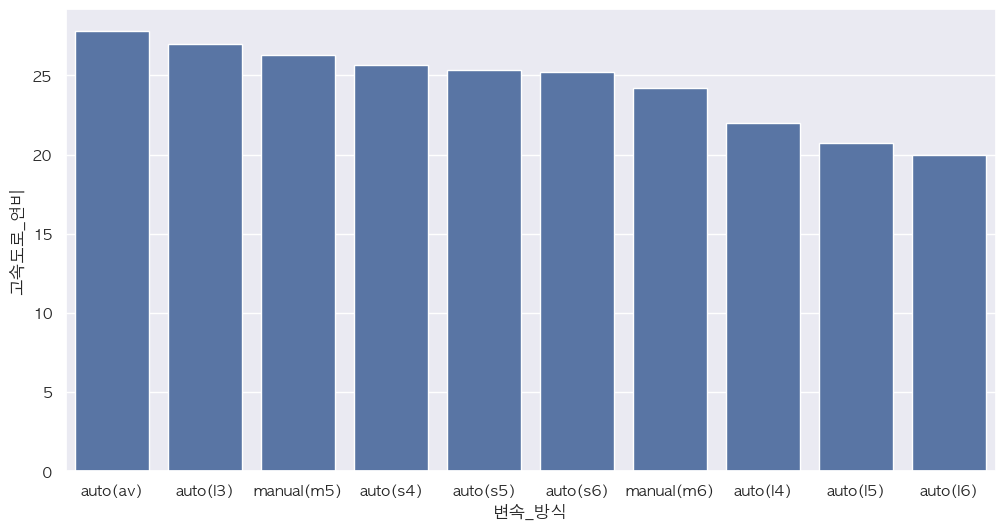

In [96]:
# 시각화 한다.
sns.barplot(data=a3, x='변속_방식', y='고속도로_연비')
plt.show()

### 문제4) 자동차의 종류(class)에 따라 시내 연비(cty)가 다른지 확인한다.

In [97]:
a1 = mpg_df[['class', 'cty']]
a1.columns = ['자동차_종류', '시내_연비']
a1

,자동차_종류,시내_연비
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16
...,...,...
229,midsize,19
230,midsize,21
231,midsize,16
232,midsize,18


In [98]:
a2 = a1.groupby('자동차_종류', as_index=False).mean()
a2.sort_values('시내_연비', ascending=False, inplace=True)
a2.reset_index(inplace=True, drop=True)
a2.columns = ['자동차_종류', '시내_연비_평균']
a2

,자동차_종류,시내_연비_평균
0,subcompact,20.371429
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
4,2seater,15.400000
5,suv,13.500000
6,pickup,13.000000


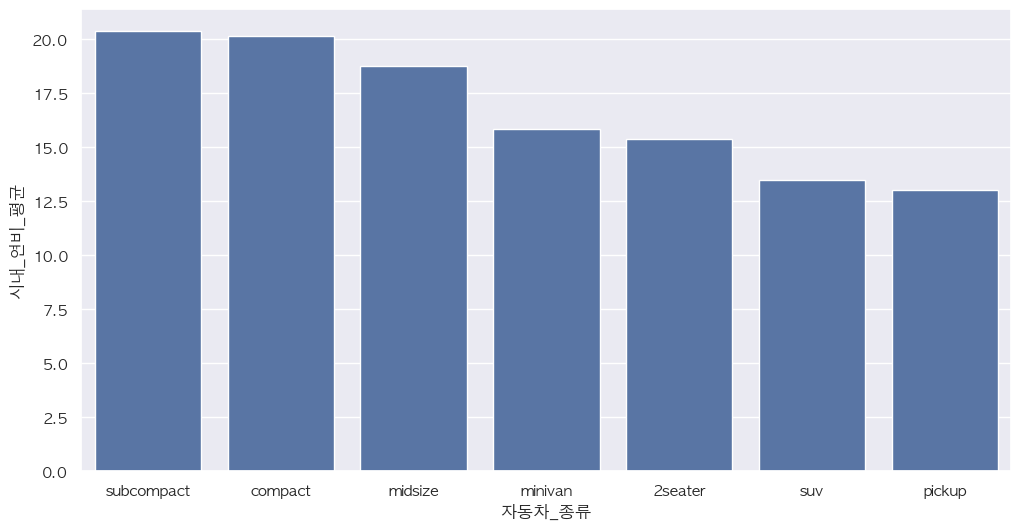

In [99]:
sns.barplot(data=a2, x='자동차_종류', y='시내_연비_평균')
plt.show()

### 문제5) 자동차 제조사(manufacturer)별 고속도로 연비(hwy) 평균이 가장 높은 top5, 시내 연비(cty) 평균이 가장 높은 top5를 각각 찾아본다.

In [100]:
a1 = mpg_df[['manufacturer', 'hwy', 'cty']]
a1.columns = ['자동차_제조사', '고속도로_연비', '시내_연비']
a1

,자동차_제조사,고속도로_연비,시내_연비
0,audi,29,18
1,audi,29,21
2,audi,31,20
3,audi,30,21
4,audi,26,16
...,...,...,...
229,volkswagen,28,19
230,volkswagen,29,21
231,volkswagen,26,16
232,volkswagen,26,18


In [102]:
# 자동차 제조사 별 고속도로 연비와 시내 연비 평균을 각각 구한다.
a2 = a1.groupby('자동차_제조사', as_index=False).mean()
a2.columns = ['자동차_제조사', '고속도로_연비_평균', '시내_연비_평균']
a2

,자동차_제조사,고속도로_연비_평균,시내_연비_평균
0,audi,26.444444,17.611111
1,chevrolet,21.894737,15.000000
2,dodge,17.945946,13.135135
3,ford,19.360000,14.000000
4,honda,32.555556,24.444444
5,hyundai,26.857143,18.642857
6,jeep,17.625000,13.500000
7,land rover,16.500000,11.500000
8,lincoln,17.000000,11.333333
9,mercury,18.000000,13.250000


In [103]:
# 고속도로 연비를 기준으로 Top 5를 확인해본다.
a3 = a2.sort_values('고속도로_연비_평균', ascending=False)
hwy_top5 = a3.head(5)
hwy_top5.reset_index(inplace=True, drop=True)
hwy_top5

,자동차_제조사,고속도로_연비_평균,시내_연비_평균
0,honda,32.555556,24.444444
1,volkswagen,29.222222,20.925926
2,hyundai,26.857143,18.642857
3,audi,26.444444,17.611111
4,pontiac,26.400000,17.000000


In [104]:
# 시내 연비를 기준으로 Top 5를 확인해본다.
a3 = a2.sort_values('시내_연비_평균', ascending=False)
cty_top5 = a3.head(5)
cty_top5.reset_index(inplace=True, drop=True)
cty_top5

,자동차_제조사,고속도로_연비_평균,시내_연비_평균
0,honda,32.555556,24.444444
1,volkswagen,29.222222,20.925926
2,subaru,25.571429,19.285714
3,hyundai,26.857143,18.642857
4,toyota,24.911765,18.529412


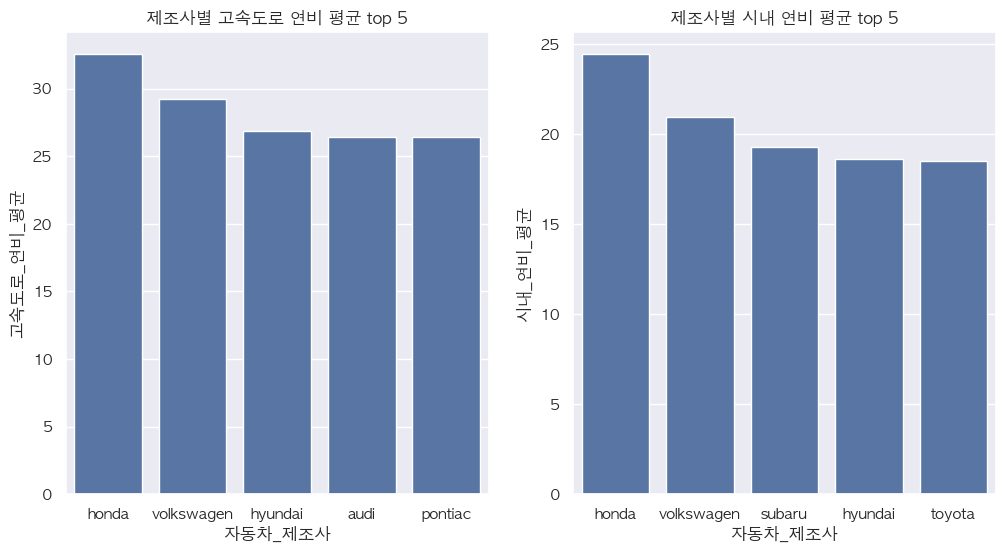

In [105]:
# 도시연비 top 5
plt.subplot(1, 2, 1)
plt.title('제조사별 고속도로 연비 평균 top 5')
sns.barplot(data=hwy_top5, x='자동차_제조사', y='고속도로_연비_평균')
# 시내 연비 top 5
plt.subplot(1, 2, 2)
plt.title('제조사별 시내 연비 평균 top 5')
sns.barplot(data=cty_top5, x='자동차_제조사', y='시내_연비_평균')
plt.show()